# Lab 2: PyTorch Basics

In [ ]:
import torch
import numpy as np

## Part 1: Tensors

Tensors operate much like numpy arrays, but have additional properties which allow them to be used more easily in machine learning, such as being compatible with GPUs and other hardware accelerators and being optimized for automatic differentiation.

### Tensor Attributes

**Shape**: A tuple (n1, n2, ... nd) indicating the dimesions of the Tensor. To refer to a particular dimension, use `dim`, (instead of `axis` for `np.array`).


**Datatype**: Form of the data stored in the Tensor. Common datatypes include `torch.float`, `torch.long`, `torch.bool`. See https://pytorch.org/docs/stable/tensors.html for full list.

**Device**: Default device is `torch.device('cpu')`. If you want to use your GPU, be sure that your PyTorch installation has CUDA compatibility. If you have a GPU available, you can set the device to `torch.device('cuda')`

*Note*: If you have more than 1 GPU available, you can choose which gpu you would like to use by providing a device index. For example, `torch.device('cuda:0')` or `torch.device('cuda', index= 0)`

In [ ]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
torch.cuda.set_device("cuda:0")

In [ ]:
torch.device("cuda")

device(type='cuda')

### Tensor Initialization

Like numpy arrays, Tensors can be initialized directly from data (in the form of a list or numpy array), or from random or constant values.

Tensors can also be converted into numpy arrays using `numpy()`. To do this, the Tensor must have its device set to `cpu`, or it will cause an error. You can easily move a Tensor to the cpu using `cpu()`. Similarly, you can move a Tensor to the GPU using `cuda()`.

In [ ]:
# From data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

# From Numpy Array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# From anaother tensor
x_ones = torch.ones_like(x_data)  # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)  # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

x_np = x_rand.cpu().numpy()  # Move tensor to the cpu and then convert to numpy array

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4741, 0.8920],
        [0.7510, 0.9823]]) 



In [ ]:
# Random and constant values
shape = (
    2,
    3,
)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9414, 0.4300, 0.6153],
        [0.1590, 0.5736, 0.0479]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Tensor Operations

Many of the artihmetic operations for Tensors are equivalent to those for numpy arrays, such as:
<ul>
<li>Indexing</li>
<li>Slicing</li>
<li>Matrix Multiplication (`@` or `tensor.matmul` )</li>
<li>Elementwise Multiplication (`*` or `tensor.mul`)</li>
<li>Addition and Subtraction</li>
</ul>

To concatenate two Tensors, the you use `torch.cat`, which is similar to `np.concatenate`.

In [ ]:
tensor = torch.ones(4, 4)
# Matrix Multiplication
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

# Elementwise Multiplication
z1 = tensor * tensor
z2 = tensor.mul(tensor)

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


Single-element items can be converted to a Python numerical value using `item()`

In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

16.0 <class 'float'>


## Part 2: Neural Net Models

In [ ]:
from torch import nn

### Defining a Model

The base class for any model in PyTorch is `nn.Module`. Every model that you building should have a `forward` function, which defines how your model processes input data.

In [ ]:
class ExModel(nn.Module):
    """
    Example model: A simple, two-layer NN with ReLU activation.
    Input dimension is 100, output dimension is 1.
    """

    def __init__(self):
        super(ExModel, self).__init__()
        self.layer1 = nn.Linear(100, 50)
        self.act1 = nn.ReLU()
        self.output_layer = nn.Linear(50, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.act1(x)
        output = self.output_layer(x)
        return output


model = ExModel()
print(model)

ExModel(
  (layer1): Linear(in_features=100, out_features=50, bias=True)
  (act1): ReLU()
  (output_layer): Linear(in_features=50, out_features=1, bias=True)
)


To process `input` using your model, simply call `model(input)`. Do not call `model.forward()` directly!

In [ ]:
batch_size = 64
input = torch.rand(batch_size, 100)
predictions = model(input)
print(predictions.shape)

torch.Size([64, 1])


### Graph-based computation: Parameters, Autograd, and Optimization

In [ ]:
# Define hyperparameters for your training before initializing the optimizer
learning_rate = 1e-1
batch_size = 64
epochs = 5

**Loss Function**

We start by defining a loss function. For Regression, the most common loss function is `nn.MSELoss` (Mean Square Error). For classification, the most common losses are `nn.NLLLoss` (Negative Log Likelihood) or `nn.CrossEntropy` (which combines `nn.LogSoftmax` and `nn/NLLLoss`).

In [ ]:
# Initialize the loss Function
loss_fn = nn.MSELoss()

**Optimizer**

Choose the optimizer you wish to use from those found in `torch.optim`. Commonly used optimizers include `SGD` and `Adam`. You can find the full list at https://pytorch.org/docs/stable/optim.html.

When you define the optimizer, you must give the parameters the optimizer is optimizing. If all your parameters are contained in your model class, you can access them using `model.parameters()`.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Training Steps**

For each iteration in the training loop, optimization occurs in three steps:
- Call `optimizer.zero_grad()` to reset the gradients of the model parameters. By default, the gradients accumulate, so this ensures that the optimizer is not double-counting </li>
-Backpropagate the prediction loss with a call to `loss.backward()`. This causes PyTorch to deposit the gradients of the loss with respect to each parameter. </li>
- Call `optimizer.step()` to update the parameters according to the optimization scheme and gradients calculated in the backwards pass. </li>

In [ ]:
# Randomly generate data and labels
data = torch.rand(batch_size, 100)
labels = torch.rand(batch_size, 1)
epochs = 10

# Training epochs
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model(data)  # Generate predictions using the model
    loss = loss_fn(out, labels)  # Loss/error
    print(f"Training Loss: {loss:.4f}")
    loss.backward()  # Propagate the gradients in backward pass
    optimizer.step()  # Update the weights

Training Loss: 0.0928
Training Loss: 0.0866
Training Loss: 0.0855
Training Loss: 0.0845
Training Loss: 0.0836
Training Loss: 0.0828
Training Loss: 0.0819
Training Loss: 0.0811
Training Loss: 0.0803
Training Loss: 0.0795


### Saving and Loading Models

The weights of a model are stored in a `state_dict`. You can train a model's state dictionary alone, or the entire model (including size and other hyperparameters). To load the weights of a model, use `model.load_statedict()`.

In [ ]:
# Saving a model state_dict
model = ExModel()
torch.save(model.state_dict(), "model_weights.pth")
model.load_state_dict(torch.load("model_weights.pth"))  # Load model weights


# Saving a full model
model = ExModel()
torch.save(model, "model.pth")
model = torch.load("model.pth")  # Load full model

During training, you can also save the state of your optimizer, which similarly has a state dictionary. This is especially important if you are using momentum-based optimizers (such as Adam).

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
torch.save(optimizer.state_dict(), "optimizer_state.pth")
optimizer.load_state_dict(torch.load("optimizer_state.pth"))

Often time, you might want to save many quantities at the same time when training a model. These can include:
- Model weights/state
- Optimizer weights/state
- Training loss
- Validation loss

One common way to say all of these at once is using a dictionary. You can access all relevant quantities at a point in training in a single checkpoint.

Note: You do not always need to save the model at each epoch. You may wish to define a `save_interval` to determine how often you save the weights.

In [ ]:
# Randomly generate data and labels
data = torch.rand(batch_size, 100)
labels = torch.rand(batch_size, 1)
epochs = 10
train_losses = []

# Training epochs
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model(data)  # Generate predictions using the model
    loss = loss_fn(out, labels)  # Loss/error
    train_loss.append(loss)
    loss.backward()  # Propagate the gradients in backward pass
    optimizer.step()
    ckpt = {
        "train_losses": train_losses,
        "model_weights": model.state_dict(),  # Define checkpoint
        "optimizer_state": optimizer.state_dict(),
    }  # dictionary
    torch.save(ckpt, f"trained_model_e{epoch}.ckpt")  # Save checkpoint for each epoch

## Example: Iris Classification

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris["data"]
y = iris["target"]
names = iris["target_names"]
feature_names = iris["feature_names"]

# Scale data to have mean 0 and variance 1
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2
)

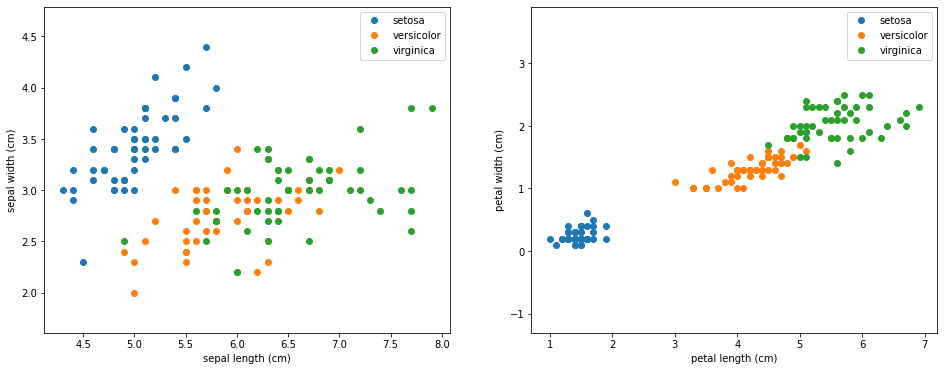

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(
        X_plot[:, 0], X_plot[:, 1], linestyle="none", marker="o", label=target_name
    )
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis("equal")
ax1.legend()

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(
        X_plot[:, 2], X_plot[:, 3], linestyle="none", marker="o", label=target_name
    )
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis("equal")
ax2.legend();

In [ ]:
import torch.nn.functional as F


class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [ ]:
model = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

In [ ]:
import tqdm

EPOCHS = 100
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 247.90it/s]


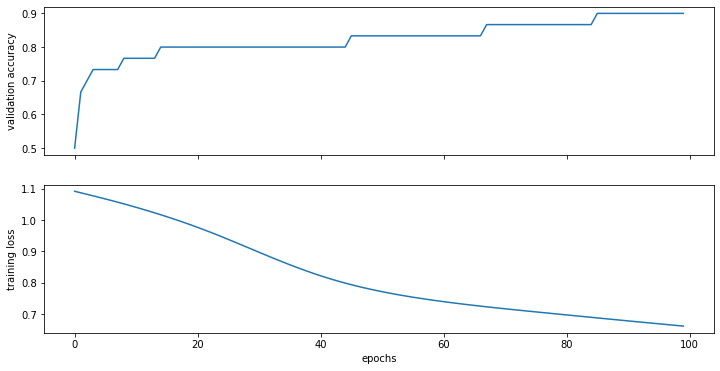

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("training loss")
ax2.set_xlabel("epochs");

## Lab Assignment: MNIST Classification Task

Design your own MNIST Classification model (see video recording for explanation of MNIST dataset). You may choose your own hyperparameters, including:
- Number of layers
- Number of neurons in each layer
- Learning rate
- Number of training epochs
- Optimizer

Using a fully-connected network, you should be able to accomplish >90% accuracy on the test set. Please report your hyperparameter selections and accuracy in a summary at the end of the notebook.

To load the MNIST dataset, we will use `torchvision`, which contains the datasets and has useful transformations. Start by defining the batch size you want for your training and test sets

In [ ]:
import torchvision
import torch
import numpy as np
from torch import nn

batch_size_train = 64  # Define train batch size
batch_size_test = 64 * 4  # Define test batch size (can be larger than train batch size)


# Use the following code to load and normalize the dataset
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        "/files/",
        train=True,
        download=True,
        transform=torchvision.transforms.Compose(
            [
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize((0.1307,), (0.3081,)),
            ]
        ),
    ),
    batch_size=batch_size_train,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        "/files/",
        train=False,
        download=True,
        transform=torchvision.transforms.Compose(
            [
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize((0.1307,), (0.3081,)),
            ]
        ),
    ),
    batch_size=batch_size_test,
    shuffle=True,
)

In [ ]:
# Define your network:
import torch.nn.functional as F


class Network(nn.Module):
    def __init__(self, input_dim):  # Can provide additional inputs for initialization
        # Define the network layer(s) and activation function(s)
        super().__init__()
        self.layer1 = nn.Linear(input_dim, 200)
        self.layer2 = nn.Linear(200, 150)
        self.layer3 = nn.Linear(150, 100)
        self.layer4 = nn.Linear(100, 50)
        self.layer5 = nn.Linear(50, 10)

    def forward(self, input):
        # How does your model process the input?

        output = F.relu(self.layer1(input))
        output = F.relu(self.layer2(output))
        output = F.relu(self.layer3(output))
        output = F.relu(self.layer4(output))
        output = F.softmax(self.layer5(output), dim=1)

        return output

In [ ]:
# Define your optimizer
model = Network(28 * 28)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0002)
epochs = 10
loss_fn = nn.CrossEntropyLoss()

loss_list = []
accuracy_list = np.zeros((epochs,))

log_interval = 50
import tqdm

for epoch in tqdm.trange(epochs):
    for idx, (data, labels) in enumerate(train_loader):
        # Calculate training loss on model
        data = torch.squeeze(data)
        pred_y = model(torch.flatten(data, start_dim=1))

        train_y = labels
        loss = loss_fn(pred_y, train_y)

        # zeros gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if idx % log_interval == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch + 1,
                    idx * len(data),
                    len(train_loader.dataset),
                    100.0 * idx / len(train_loader),
                    loss.item(),
                )
            )
            loss_list.append(loss.item())

    # Calculate loss on test set

    with torch.no_grad():
        n_sample = len(test_loader.dataset)
        n_correct = 0
        for data, labels in test_loader:

            squeezed_X = torch.squeeze(data)
            pred_y = model(torch.flatten(squeezed_X, start_dim=1))

            test_y = labels

            n_correct += sum(
                (torch.argmax(pred_y, dim=1) == test_y).type(torch.FloatTensor)
            )

        accuracy_list[epoch] = 100.0 * n_correct / n_sample
        print(
            "\nTest set: number of correct labels: {}/{} accuracy: ({:.0f}%)\n".format(
                int(n_correct), n_sample, 100.0 * n_correct / n_sample
            )
        )

  0%|          | 0/10 [00:00<?, ?it/s]

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301421
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.113902
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.940840
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.851046
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.717590
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.841104
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.763824
Train Epoch: 1 [22400/60000 (37%)]	Loss: 1.626356
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.722813
Train Epoch: 1 [28800/60000 (48%)]	Loss: 1.733687
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.723415
Train Epoch: 1 [35200/60000 (59%)]	Loss: 1.668278
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.658193
Train Epoch: 1 [41600/60000 (69%)]	Loss: 1.677388
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.668270
Train Epoch: 1 [48000/60000 (80%)]	Loss: 1.769268
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.778240
Train Epoch: 1 [54400/60000 (91%)]	Loss: 1.700649
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.687807


 10%|█         | 1/10 [00:14<02:09, 14.35s/it]


Test set: number of correct labels: 7692/10000 accuracy: (77%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.636410
Train Epoch: 2 [3200/60000 (5%)]	Loss: 1.704467
Train Epoch: 2 [6400/60000 (11%)]	Loss: 1.713370
Train Epoch: 2 [9600/60000 (16%)]	Loss: 1.686240
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.655894
Train Epoch: 2 [16000/60000 (27%)]	Loss: 1.714453
Train Epoch: 2 [19200/60000 (32%)]	Loss: 1.671871
Train Epoch: 2 [22400/60000 (37%)]	Loss: 1.721429
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.781616
Train Epoch: 2 [28800/60000 (48%)]	Loss: 1.714097
Train Epoch: 2 [32000/60000 (53%)]	Loss: 1.581227
Train Epoch: 2 [35200/60000 (59%)]	Loss: 1.633413
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.589345
Train Epoch: 2 [41600/60000 (69%)]	Loss: 1.597507
Train Epoch: 2 [44800/60000 (75%)]	Loss: 1.640598
Train Epoch: 2 [48000/60000 (80%)]	Loss: 1.650186
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.605100
Train Epoch: 2 [54400/60000 (91%)]	Loss: 1.599054
Train Epoch: 2 [57600/60000 (96%)]	Loss: 1.6

 20%|██        | 2/10 [00:28<01:54, 14.36s/it]


Test set: number of correct labels: 8559/10000 accuracy: (86%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.551282
Train Epoch: 3 [3200/60000 (5%)]	Loss: 1.709438
Train Epoch: 3 [6400/60000 (11%)]	Loss: 1.604449
Train Epoch: 3 [9600/60000 (16%)]	Loss: 1.617049
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.604357
Train Epoch: 3 [16000/60000 (27%)]	Loss: 1.638196
Train Epoch: 3 [19200/60000 (32%)]	Loss: 1.587871
Train Epoch: 3 [22400/60000 (37%)]	Loss: 1.605658
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.637497
Train Epoch: 3 [28800/60000 (48%)]	Loss: 1.617574
Train Epoch: 3 [32000/60000 (53%)]	Loss: 1.640643
Train Epoch: 3 [35200/60000 (59%)]	Loss: 1.655257
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.574594
Train Epoch: 3 [41600/60000 (69%)]	Loss: 1.676083
Train Epoch: 3 [44800/60000 (75%)]	Loss: 1.592180
Train Epoch: 3 [48000/60000 (80%)]	Loss: 1.628388
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.570886
Train Epoch: 3 [54400/60000 (91%)]	Loss: 1.592803
Train Epoch: 3 [57600/60000 (96%)]	Loss: 1.6

 30%|███       | 3/10 [00:43<01:40, 14.36s/it]


Test set: number of correct labels: 8676/10000 accuracy: (87%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.588177
Train Epoch: 4 [3200/60000 (5%)]	Loss: 1.599092
Train Epoch: 4 [6400/60000 (11%)]	Loss: 1.577877
Train Epoch: 4 [9600/60000 (16%)]	Loss: 1.620192
Train Epoch: 4 [12800/60000 (21%)]	Loss: 1.576047
Train Epoch: 4 [16000/60000 (27%)]	Loss: 1.638833
Train Epoch: 4 [19200/60000 (32%)]	Loss: 1.588683
Train Epoch: 4 [22400/60000 (37%)]	Loss: 1.572468
Train Epoch: 4 [25600/60000 (43%)]	Loss: 1.605004
Train Epoch: 4 [28800/60000 (48%)]	Loss: 1.684428
Train Epoch: 4 [32000/60000 (53%)]	Loss: 1.597835
Train Epoch: 4 [35200/60000 (59%)]	Loss: 1.650473
Train Epoch: 4 [38400/60000 (64%)]	Loss: 1.652610
Train Epoch: 4 [41600/60000 (69%)]	Loss: 1.570577
Train Epoch: 4 [44800/60000 (75%)]	Loss: 1.612379
Train Epoch: 4 [48000/60000 (80%)]	Loss: 1.537346
Train Epoch: 4 [51200/60000 (85%)]	Loss: 1.538824
Train Epoch: 4 [54400/60000 (91%)]	Loss: 1.555268
Train Epoch: 4 [57600/60000 (96%)]	Loss: 1.5

 40%|████      | 4/10 [00:57<01:25, 14.33s/it]


Test set: number of correct labels: 8683/10000 accuracy: (87%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 1.494350
Train Epoch: 5 [3200/60000 (5%)]	Loss: 1.525364
Train Epoch: 5 [6400/60000 (11%)]	Loss: 1.558767
Train Epoch: 5 [9600/60000 (16%)]	Loss: 1.647411
Train Epoch: 5 [12800/60000 (21%)]	Loss: 1.544707
Train Epoch: 5 [16000/60000 (27%)]	Loss: 1.556974
Train Epoch: 5 [19200/60000 (32%)]	Loss: 1.582628
Train Epoch: 5 [22400/60000 (37%)]	Loss: 1.595652
Train Epoch: 5 [25600/60000 (43%)]	Loss: 1.551949
Train Epoch: 5 [28800/60000 (48%)]	Loss: 1.610070
Train Epoch: 5 [32000/60000 (53%)]	Loss: 1.544055
Train Epoch: 5 [35200/60000 (59%)]	Loss: 1.631157
Train Epoch: 5 [38400/60000 (64%)]	Loss: 1.552845
Train Epoch: 5 [41600/60000 (69%)]	Loss: 1.552279
Train Epoch: 5 [44800/60000 (75%)]	Loss: 1.556224
Train Epoch: 5 [48000/60000 (80%)]	Loss: 1.621461
Train Epoch: 5 [51200/60000 (85%)]	Loss: 1.629600
Train Epoch: 5 [54400/60000 (91%)]	Loss: 1.638696
Train Epoch: 5 [57600/60000 (96%)]	Loss: 1.6

 50%|█████     | 5/10 [01:11<01:11, 14.31s/it]


Test set: number of correct labels: 8730/10000 accuracy: (87%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 1.623443
Train Epoch: 6 [3200/60000 (5%)]	Loss: 1.564567
Train Epoch: 6 [6400/60000 (11%)]	Loss: 1.519914
Train Epoch: 6 [9600/60000 (16%)]	Loss: 1.584333
Train Epoch: 6 [12800/60000 (21%)]	Loss: 1.590146
Train Epoch: 6 [16000/60000 (27%)]	Loss: 1.617979
Train Epoch: 6 [19200/60000 (32%)]	Loss: 1.565539
Train Epoch: 6 [22400/60000 (37%)]	Loss: 1.621482
Train Epoch: 6 [25600/60000 (43%)]	Loss: 1.575292
Train Epoch: 6 [28800/60000 (48%)]	Loss: 1.605138
Train Epoch: 6 [32000/60000 (53%)]	Loss: 1.585642
Train Epoch: 6 [35200/60000 (59%)]	Loss: 1.558798
Train Epoch: 6 [38400/60000 (64%)]	Loss: 1.644053
Train Epoch: 6 [41600/60000 (69%)]	Loss: 1.538210
Train Epoch: 6 [44800/60000 (75%)]	Loss: 1.564613
Train Epoch: 6 [48000/60000 (80%)]	Loss: 1.556241
Train Epoch: 6 [51200/60000 (85%)]	Loss: 1.606027
Train Epoch: 6 [54400/60000 (91%)]	Loss: 1.604909
Train Epoch: 6 [57600/60000 (96%)]	Loss: 1.5

 60%|██████    | 6/10 [01:25<00:57, 14.31s/it]


Test set: number of correct labels: 8793/10000 accuracy: (88%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 1.630397
Train Epoch: 7 [3200/60000 (5%)]	Loss: 1.611943
Train Epoch: 7 [6400/60000 (11%)]	Loss: 1.577468
Train Epoch: 7 [9600/60000 (16%)]	Loss: 1.463540
Train Epoch: 7 [12800/60000 (21%)]	Loss: 1.586448
Train Epoch: 7 [16000/60000 (27%)]	Loss: 1.675476
Train Epoch: 7 [19200/60000 (32%)]	Loss: 1.602045
Train Epoch: 7 [22400/60000 (37%)]	Loss: 1.578533
Train Epoch: 7 [25600/60000 (43%)]	Loss: 1.555011
Train Epoch: 7 [28800/60000 (48%)]	Loss: 1.523335
Train Epoch: 7 [32000/60000 (53%)]	Loss: 1.600094
Train Epoch: 7 [35200/60000 (59%)]	Loss: 1.526065
Train Epoch: 7 [38400/60000 (64%)]	Loss: 1.515370
Train Epoch: 7 [41600/60000 (69%)]	Loss: 1.555584
Train Epoch: 7 [44800/60000 (75%)]	Loss: 1.514175
Train Epoch: 7 [48000/60000 (80%)]	Loss: 1.555443
Train Epoch: 7 [51200/60000 (85%)]	Loss: 1.530574
Train Epoch: 7 [54400/60000 (91%)]	Loss: 1.530205
Train Epoch: 7 [57600/60000 (96%)]	Loss: 1.5

 70%|███████   | 7/10 [01:40<00:42, 14.30s/it]


Test set: number of correct labels: 9527/10000 accuracy: (95%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 1.533193
Train Epoch: 8 [3200/60000 (5%)]	Loss: 1.497054
Train Epoch: 8 [6400/60000 (11%)]	Loss: 1.518745
Train Epoch: 8 [9600/60000 (16%)]	Loss: 1.492525
Train Epoch: 8 [12800/60000 (21%)]	Loss: 1.499320
Train Epoch: 8 [16000/60000 (27%)]	Loss: 1.526850
Train Epoch: 8 [19200/60000 (32%)]	Loss: 1.502183
Train Epoch: 8 [22400/60000 (37%)]	Loss: 1.544489
Train Epoch: 8 [25600/60000 (43%)]	Loss: 1.477868
Train Epoch: 8 [28800/60000 (48%)]	Loss: 1.489028
Train Epoch: 8 [32000/60000 (53%)]	Loss: 1.501173
Train Epoch: 8 [35200/60000 (59%)]	Loss: 1.493779
Train Epoch: 8 [38400/60000 (64%)]	Loss: 1.504226
Train Epoch: 8 [41600/60000 (69%)]	Loss: 1.486365
Train Epoch: 8 [44800/60000 (75%)]	Loss: 1.553633
Train Epoch: 8 [48000/60000 (80%)]	Loss: 1.469024
Train Epoch: 8 [51200/60000 (85%)]	Loss: 1.506424
Train Epoch: 8 [54400/60000 (91%)]	Loss: 1.463675
Train Epoch: 8 [57600/60000 (96%)]	Loss: 1.5

 80%|████████  | 8/10 [01:54<00:28, 14.33s/it]


Test set: number of correct labels: 9643/10000 accuracy: (96%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 1.513513
Train Epoch: 9 [3200/60000 (5%)]	Loss: 1.505146
Train Epoch: 9 [6400/60000 (11%)]	Loss: 1.473378
Train Epoch: 9 [9600/60000 (16%)]	Loss: 1.518213
Train Epoch: 9 [12800/60000 (21%)]	Loss: 1.487057
Train Epoch: 9 [16000/60000 (27%)]	Loss: 1.465719
Train Epoch: 9 [19200/60000 (32%)]	Loss: 1.483410
Train Epoch: 9 [22400/60000 (37%)]	Loss: 1.525116
Train Epoch: 9 [25600/60000 (43%)]	Loss: 1.519583
Train Epoch: 9 [28800/60000 (48%)]	Loss: 1.464449
Train Epoch: 9 [32000/60000 (53%)]	Loss: 1.495086
Train Epoch: 9 [35200/60000 (59%)]	Loss: 1.483229
Train Epoch: 9 [38400/60000 (64%)]	Loss: 1.498452
Train Epoch: 9 [41600/60000 (69%)]	Loss: 1.526713
Train Epoch: 9 [44800/60000 (75%)]	Loss: 1.509376
Train Epoch: 9 [48000/60000 (80%)]	Loss: 1.507929
Train Epoch: 9 [51200/60000 (85%)]	Loss: 1.495227
Train Epoch: 9 [54400/60000 (91%)]	Loss: 1.497007
Train Epoch: 9 [57600/60000 (96%)]	Loss: 1.4

 90%|█████████ | 9/10 [02:08<00:14, 14.33s/it]


Test set: number of correct labels: 9672/10000 accuracy: (97%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 1.500812
Train Epoch: 10 [3200/60000 (5%)]	Loss: 1.476207
Train Epoch: 10 [6400/60000 (11%)]	Loss: 1.514138
Train Epoch: 10 [9600/60000 (16%)]	Loss: 1.471831
Train Epoch: 10 [12800/60000 (21%)]	Loss: 1.490201
Train Epoch: 10 [16000/60000 (27%)]	Loss: 1.482971
Train Epoch: 10 [19200/60000 (32%)]	Loss: 1.508776
Train Epoch: 10 [22400/60000 (37%)]	Loss: 1.464060
Train Epoch: 10 [25600/60000 (43%)]	Loss: 1.479771
Train Epoch: 10 [28800/60000 (48%)]	Loss: 1.480289
Train Epoch: 10 [32000/60000 (53%)]	Loss: 1.472403
Train Epoch: 10 [35200/60000 (59%)]	Loss: 1.513766
Train Epoch: 10 [38400/60000 (64%)]	Loss: 1.470648
Train Epoch: 10 [41600/60000 (69%)]	Loss: 1.480012
Train Epoch: 10 [44800/60000 (75%)]	Loss: 1.477365
Train Epoch: 10 [48000/60000 (80%)]	Loss: 1.490874
Train Epoch: 10 [51200/60000 (85%)]	Loss: 1.481414
Train Epoch: 10 [54400/60000 (91%)]	Loss: 1.500019
Train Epoch: 10 [57600/600

100%|██████████| 10/10 [02:23<00:00, 14.33s/it]


Test set: number of correct labels: 9673/10000 accuracy: (97%)



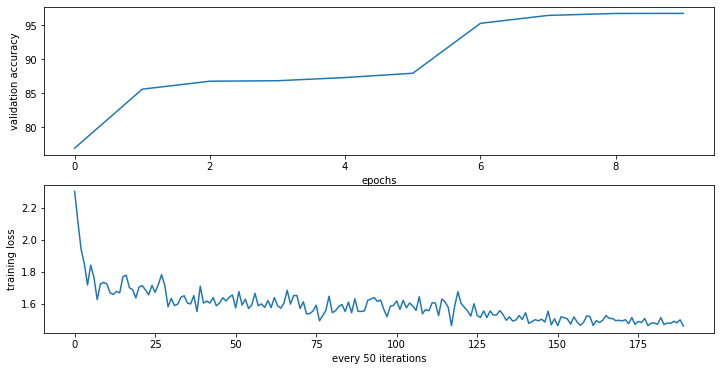

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=False)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax1.set_xlabel("epochs")
ax2.plot(loss_list)
ax2.set_ylabel("training loss")
ax2.set_xlabel("every 50 iterations");

## Questions to answer:

**A**:  The hyperparameters I choose to vary are number of layers, number of neurons (As I increase the number of layers, I decrease the dimensionality difference between consecutive layers), and learning rate. 

For learning rate, I start with 0.2, then decrease it in steps by a factor of 10. Ultimately, I use 0.0002 which converges efficiently and computational fridendly. 

For number of layers, I start with 4 layers, then increase it to 5. The result shows that 5 layers gives less loss and better accuracy. As I increase number of layers from 4 to 5, I decrease the step of dimensionality drop between consecutive layers. For example, I insert a layer between layers (28*28, 200) and (200, 100), so it becomes (28*28, 200), (200, 150), and (150, 100). 

**B**: Parameters Network used

* 5 Layers
* From the first layer to the output layer, each contains 200, 150, 100, 50, and 10 neurons
* ReLu for activation function, softmax for the output layer
* Learning rate: 0.0002
* Epochs number: 10
* Train batch size: 64, test: 64*4

**C**: The best accuracy achieved is 97\%